In [1]:
from pylab import rcParams
import pandas as pd
import seaborn as sns

In [2]:
# magic function для отображения графиков
%pylab inline
# для сохранения в svg
%config InlineBackend.figure_format = 'svg'
#увеличим дефолтный размер графиков
rcParams['figure.figsize'] = 8, 5
pd.options.mode.chained_assignment = None

Populating the interactive namespace from numpy and matplotlib


In [3]:
df_train = pd.read_csv("data/train.csv", parse_dates=['timestamp'])

In [4]:
# из описания я возьму фичи, которые описывают свойства помещение + стоимость и рассмотрю их в первую очередь 
df_with_house_features = df_train[['full_sq', 'life_sq', 'floor', 'max_floor', 'build_year', 'num_room', 
                    'kitch_sq', 'state', 'sub_area', 'price_doc']]

In [5]:
# посмотрим на данные
df_with_house_features.describe()

,full_sq,life_sq,floor,max_floor,build_year,num_room,kitch_sq,state,price_doc
count,30471.000000,24088.000000,30304.000000,20899.000000,1.686600e+04,20899.000000,20899.000000,16912.000000,3.047100e+04
mean,54.214269,34.403271,7.670803,12.558974,3.068057e+03,1.909804,6.399301,2.107025,7.123035e+06
std,38.031487,52.285733,5.319989,6.756550,1.543878e+05,0.851805,28.265979,0.880148,4.780111e+06
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000,1.000000e+05
25%,38.000000,20.000000,3.000000,9.000000,1.967000e+03,1.000000,1.000000,1.000000,4.740002e+06
50%,49.000000,30.000000,6.500000,12.000000,1.979000e+03,2.000000,6.000000,2.000000,6.274411e+06
75%,63.000000,43.000000,11.000000,17.000000,2.005000e+03,2.000000,9.000000,3.000000,8.300000e+06
max,5326.000000,7478.000000,77.000000,117.000000,2.005201e+07,19.000000,2014.000000,33.000000,1.111111e+08


In [6]:
# определим округ по району, данные по разбиению взяты из 
# https://ru.wikipedia.org/wiki/%D0%A1%D0%BF%D0%B8%D1%81%D0%BE%D0%BA_%D1%80%D0%B0%D0%B9%D0%BE%D0%BD%D0%BE%D0%B2_%D0%B8_%D0%BF%D0%BE%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B9_%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D1%8B
def get_region(x):    
    if (x['sub_area'] in ["Krjukovo","Matushkino","Savelki","Silino","Staroe Krjukovo"]):
        return 'Zelenograd'
    if (x['sub_area'] in ["Poselenie Desjonovskoe","Poselenie Filimonkovskoe",
         "Poselenie Kokoshkino","Poselenie Marushkinskoe",
         "Poselenie Moskovskij","Poselenie Mosrentgen",
         "Poselenie Rjazanovskoe","Poselenie Shherbinka",
         "Poselenie Sosenskoe","Poselenie Vnukovskoe",
         "Poselenie Voskresenskoe"]):
        return 'Novomoskovsky'
    if (x['sub_area'] in ["Poselenie Kievskij","Poselenie Klenovskoe",
         "Poselenie Krasnopahorskoe",
         "Poselenie Mihajlovo-Jarcevskoe",
         "Poselenie Novofedorovskoe",
         "Poselenie Pervomajskoe","Poselenie Rogovskoe",
         "Poselenie Shhapovskoe","Poselenie Voronovskoe",
         "Troickij okrug"]):
        return 'Troitsky'
    if (x['sub_area'] in ["Ajeroport","Begovoe","Beskudnikovskoe",
         "Dmitrovskoe","Golovinskoe","Horoshevskoe",
         "Hovrino","Koptevo","Levoberezhnoe",
         "Molzhaninovskoe","Savelovskoe","Sokol",
         "Timirjazevskoe","Vojkovskoe",
         "Vostochnoe Degunino","Zapadnoe Degunino"]):
        return 'Northern'
    if (x['sub_area'] in ["Akademicheskoe","Cheremushki","Gagarinskoe",
         "Jasenevo","Juzhnoe Butovo","Kon'kovo",
         "Kotlovka","Lomonosovskoe","Obruchevskoe",
         "Severnoe Butovo","Teplyj Stan","Zjuzino"]):
        return 'Southwest'
    if (x['sub_area'] in ["Alekseevskoe","Altuf'evskoe","Babushkinskoe",
         "Bibirevo","Butyrskoe","Jaroslavskoe",
         "Juzhnoe Medvedkovo","Lianozovo",
         "Losinoostrovskoe","Mar'ina Roshha",
         "Marfino","Ostankinskoe","Otradnoe",
         "Rostokino","Severnoe",
         "Severnoe Medvedkovo","Sviblovo"]):
        return 'Northeast'
    if (x['sub_area'] in ["Arbat","Basmannoe","Hamovniki",
         "Jakimanka","Krasnosel'skoe",
         "Meshhanskoe","Presnenskoe",
         "Taganskoe","Tverskoe",
         "Zamoskvorech'e"]):
        return 'Central'
    if (x['sub_area'] in ["Birjulevo Vostochnoe","Birjulevo Zapadnoe",
         "Brateevo","Caricyno","Chertanovo Central'noe",
         "Chertanovo Juzhnoe","Chertanovo Severnoe",
         "Danilovskoe","Donskoe","Moskvorech'e-Saburovo",
         "Nagatino-Sadovniki","Nagatinskij Zaton",
         "Nagornoe","Orehovo-Borisovo Juzhnoe",
         "Orehovo-Borisovo Severnoe","Zjablikovo"]):
        return 'Southern'
    if (x['sub_area'] in ["Bogorodskoe","Gol'janovo","Ivanovskoe",
         "Izmajlovo","Kosino-Uhtomskoe","Metrogorodok",
         "Novogireevo","Novokosino","Perovo",
         "Preobrazhenskoe","Severnoe Izmajlovo",
         "Sokol'niki","Sokolinaja Gora","Veshnjaki",
         "Vostochnoe","Vostochnoe Izmajlovo"]):
        return 'Eastern'
    if (x['sub_area'] in ["Dorogomilovo","Filevskij Park","Fili Davydkovo",
         "Krylatskoe","Kuncevo","Mozhajskoe",
         "Novo-Peredelkino","Ochakovo-Matveevskoe",
         "Prospekt Vernadskogo","Ramenki","Solncevo",
         "Troparevo-Nikulino","Vnukovo"]):
        return 'Western'
    if (x['sub_area'] in ["Horoshevo-Mnevniki","Juzhnoe Tushino",
         "Kurkino","Mitino","Pokrovskoe Streshnevo",
         "Severnoe Tushino","Shhukino","Strogino"]):
        return 'Northwest'
    if (x['sub_area'] in ["Juzhnoportovoe","Kapotnja","Kuz'minki",
         "Lefortovo","Ljublino","Mar'ino","Nekrasovka",
         "Nizhegorodskoe","Pechatniki","Rjazanskij",
         "Tekstil'shhiki","Vyhino-Zhulebino"]):
        return 'Southeast'

In [7]:
# количество пропусков в дате посчитаем по столбцу sub_area
df_with_house_features[df_with_house_features['sub_area'].isnull()].shape[0]

0

In [8]:
# добавим новый столбец с округами
df_with_house_features['okrug'] = df_with_house_features.apply(get_region, axis=1)


In [9]:
df_with_house_features.head()

,full_sq,life_sq,floor,max_floor,build_year,num_room,kitch_sq,state,sub_area,price_doc,okrug
0,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,Bibirevo,5850000,Northeast
1,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,Nagatinskij Zaton,6000000,Southern
2,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,Tekstil'shhiki,5700000,Southeast
3,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,Mitino,13100000,Northwest
4,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,Basmannoe,16331452,Central


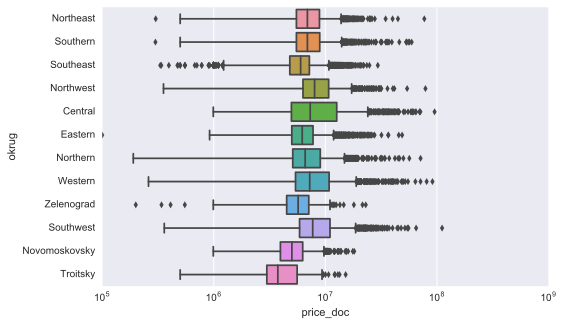

In [12]:
top_okrug = df_with_house_features.okrug.value_counts().sort_values(ascending = False).index.values
ax = sns.boxplot(y="okrug", x="price_doc", 
            data=df_with_house_features[df_with_house_features.okrug.isin(top_okrug)], orient="h")
ax.set_xscale('log')